# CIA World Factbook

We'll work with data from the [CIA World Factbook](https://www.cia.gov/library/publications/the-world-factbook/), a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

* `population` - The population as of 2015.
* `population_growth` - The annual population growth rate, as a percentage.
* `area` - The total land and water area.

The database can be downloaded from [here](https://github.com/factbook/factbook.sql/releases).

**Goals** This is a simple exploratory project, to practise using SQLite and Python.

In [6]:
import sqlite3 as sq
import pandas as pd

#connecting to db
conn = sq.connect('factbook.db')

#see the first 5 rows
q = 'Select * from facts limit 5'

pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442,442,0,92436,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400,2736690,43710,43431886,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743,28203,1540,3056382,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220,7682300,58920,22751014,1.07,12.15,7.14,5.65
9,10,au,Austria,83871,82445,1426,8665550,0.55,9.41,9.42,5.56


Here are the descriptions for some of the columns in the table above.

* `name` - The name of the country.
* `area` - The total land and sea area of the country.
* `population` - The country's population.
* `population_growth`- The country's population growth as a percentage.
* `birth_rate` - The country's birth rate, or the number of births a year per 1,000 people.
* `death_rate` - The country's death rate, or the number of death a year per 1,000 people.
* `area` - The country's total area (both land and water).
* `area_land` - The country's land area in square kilometers.
* `area_water` - The country's waterarea in square kilometers.

In [10]:
qmaxmin = 'Select MAX(population), MIN(population), MAX(population_growth), MIN(population_growth) from facts'
pd.read_sql_query(qmaxmin, conn)

,MAX(population),MIN(population),MAX(population_growth),MIN(population_growth)
0,7256490011,0,4.02,0.0


In [13]:
qzero = 'select name from facts where population = 0'
pd.read_sql_query(qzero, conn)

,name
0,Antarctica


In [14]:
qmany = 'select name from facts where population = 7256490011'
pd.read_sql_query(qmany, conn)

,name
0,World


Observations:
There are two rows in the database with unusual values: zero and over 7.2 billion.

* The row with a value of zero is Antarctica, considered a country with zero populaiton.
* There exists a row with a total population value for the world.

For calculating any averages, these rows would need to be removed, or otherwise not included in the calculations.

## Visualising

In [38]:
#display the db removing the population related outliers
qvis = 'select population, population_growth, birth_rate, death_rate from facts where 0<population<	7256490011'
facts1 = pd.read_sql_query(qvis, conn)
facts1

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


In [49]:
facts1['population'].dtype

dtype('int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79ba822208>,
      dtype=object)

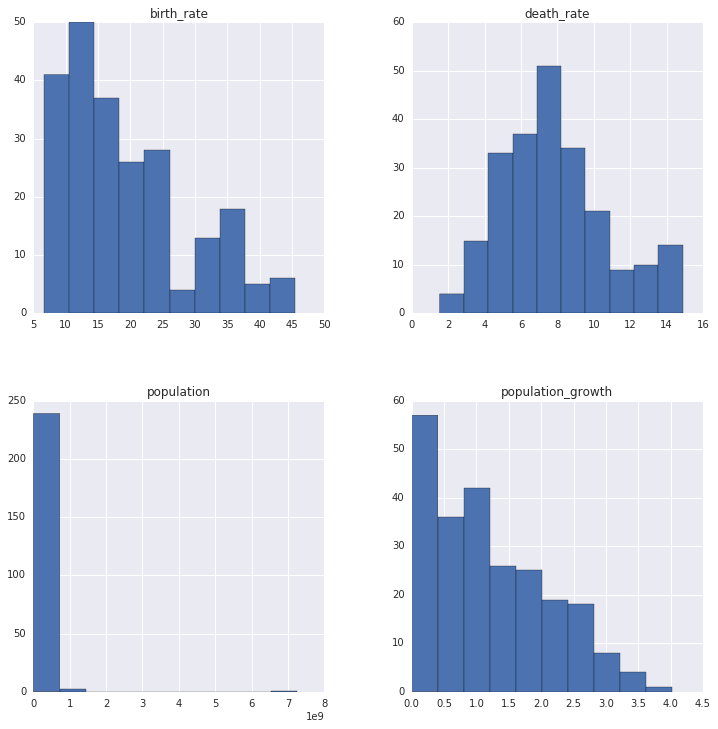

In [41]:
#create a 2x2 grid of histograms of all values
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

facts1.hist(figsize =(12,12))

### Which countries have the highest population density?

In [63]:
#population density is ratio population/area
#select 10 highest density countries

qdensity = 'select name, cast(population as float)/cast(area as float) as density from facts where 0<population<7256490011 order by density desc limit 10'
density = pd.read_sql_query(qdensity, conn)
density

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


The highest population density is in Macau.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79b9e85da0>]],
      dtype=object)

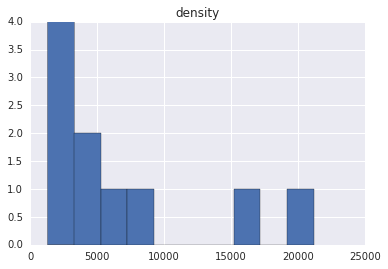

In [64]:
#histogram of population densities
pd.read_sql_query(qdensity, conn).hist()

### Which countries have the highest ratios of water to land?

In [69]:
#find 10 countries with highest water to land ratio
qwater = '''
    select name, cast(area_water as float)/cast(area_land as float) as w_l_ratio 
    from facts 
    where 0<population<7256490011 
    order by w_l_ratio desc 
    limit 10
    '''
water_ratio = pd.read_sql_query(qwater, conn)
water_ratio

,name,w_l_ratio
0,Virgin Islands,4.520231
1,Puerto Rico,0.554791
2,"Bahamas, The",0.386613
3,Guinea-Bissau,0.284673
4,Malawi,0.259396
5,Netherlands,0.225710
6,Uganda,0.222922
7,Eritrea,0.164356
8,Liberia,0.156240
9,Bangladesh,0.140509


### Which countries have more water than land?

In [75]:
#find countries with more water than land
qmore = '''
    select name, area_water, area_land
    from facts 
    where (0<population<7256490011) & (cast(area_water as float)> cast(area_land as float))
    limit 10
    '''
more = pd.read_sql_query(qmore, conn)
more

,name,area_water,area_land
0,Virgin Islands,1564,346


There is one country which has more water than land: Virgin Islands.